# 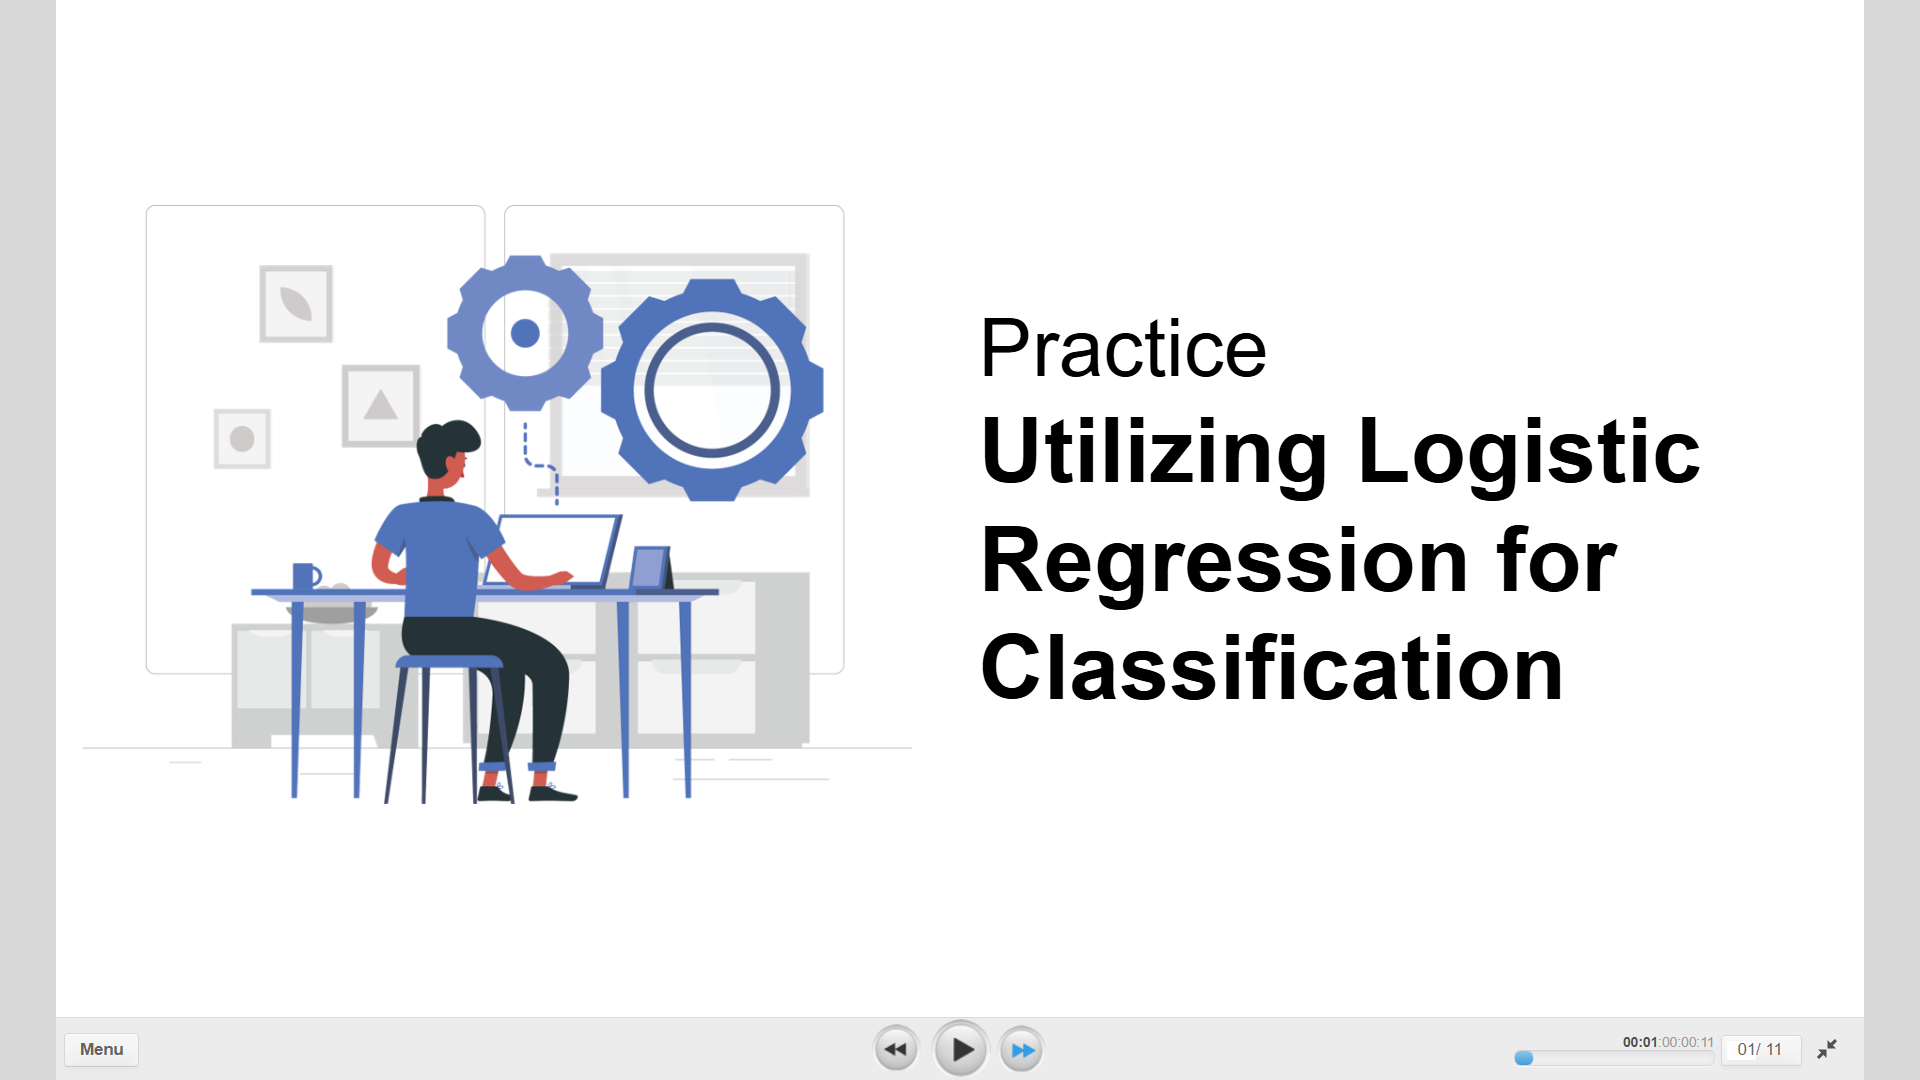

# 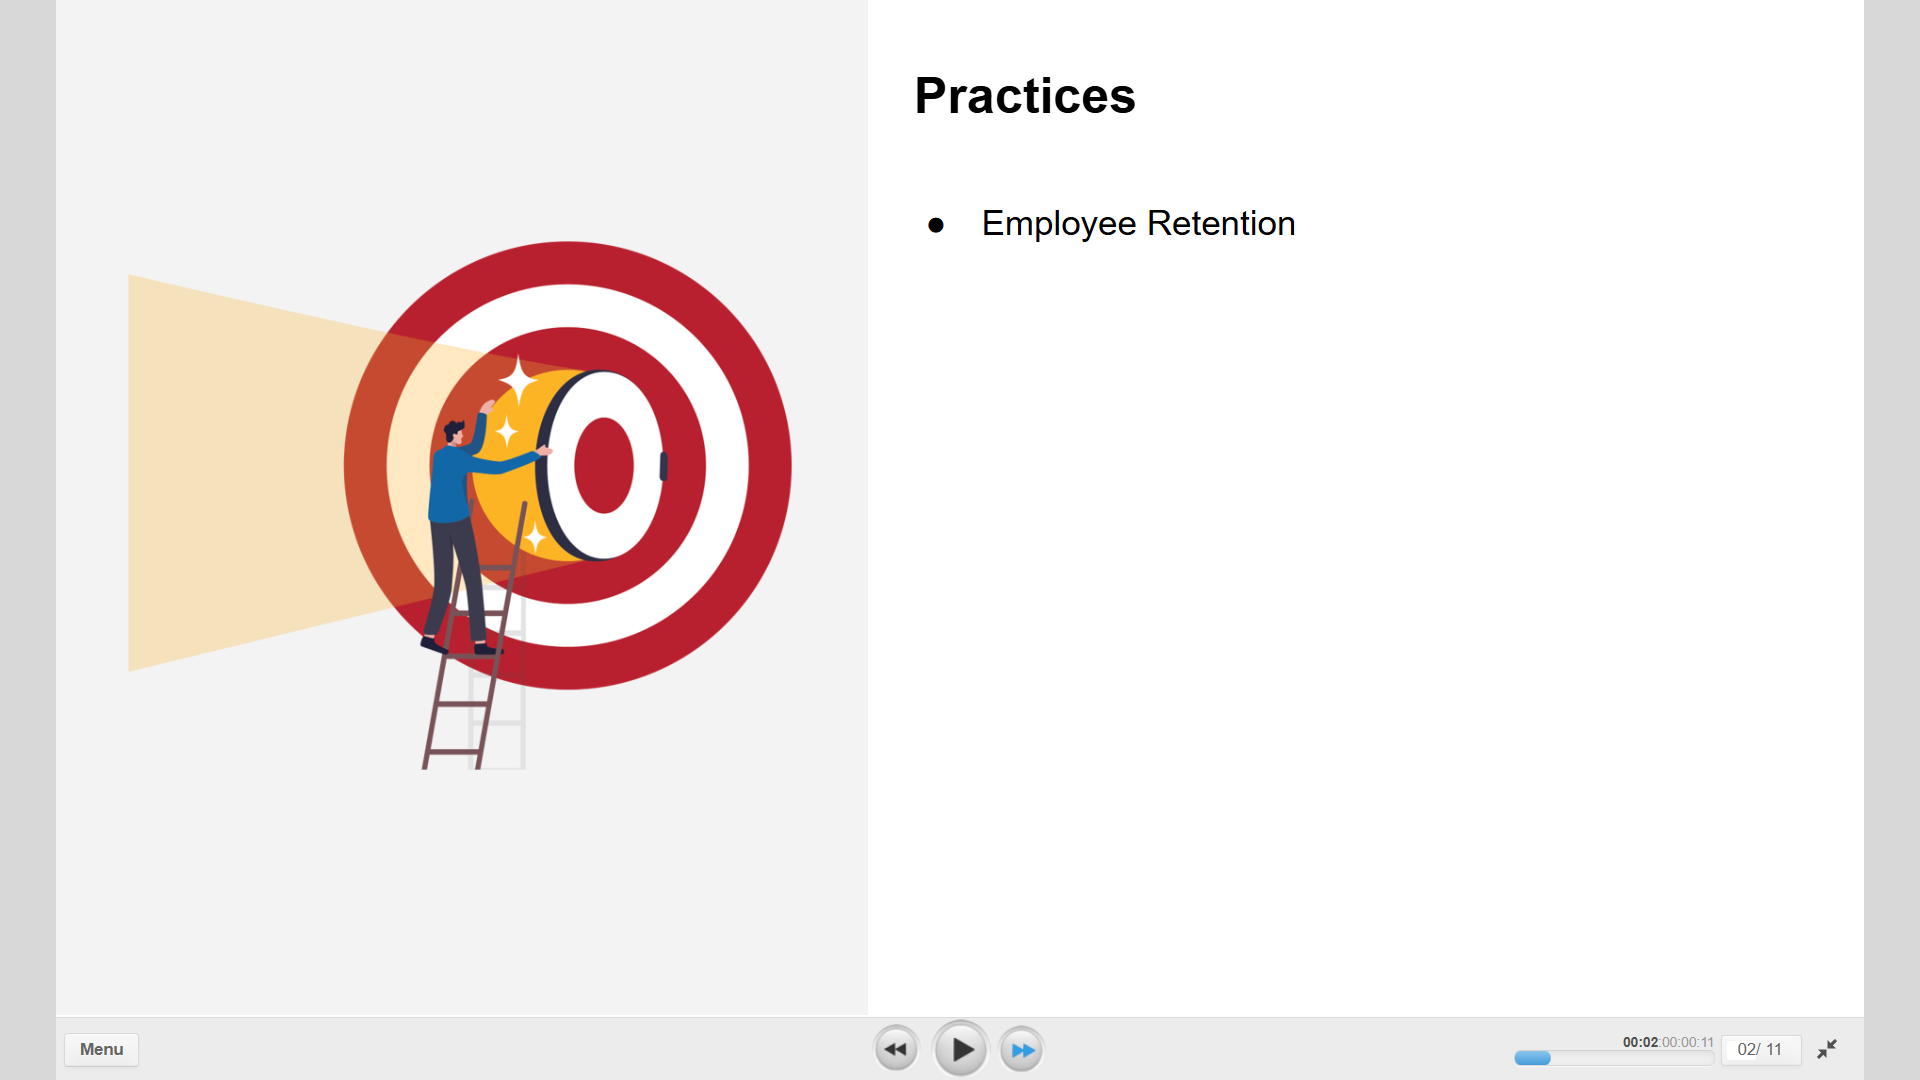

# 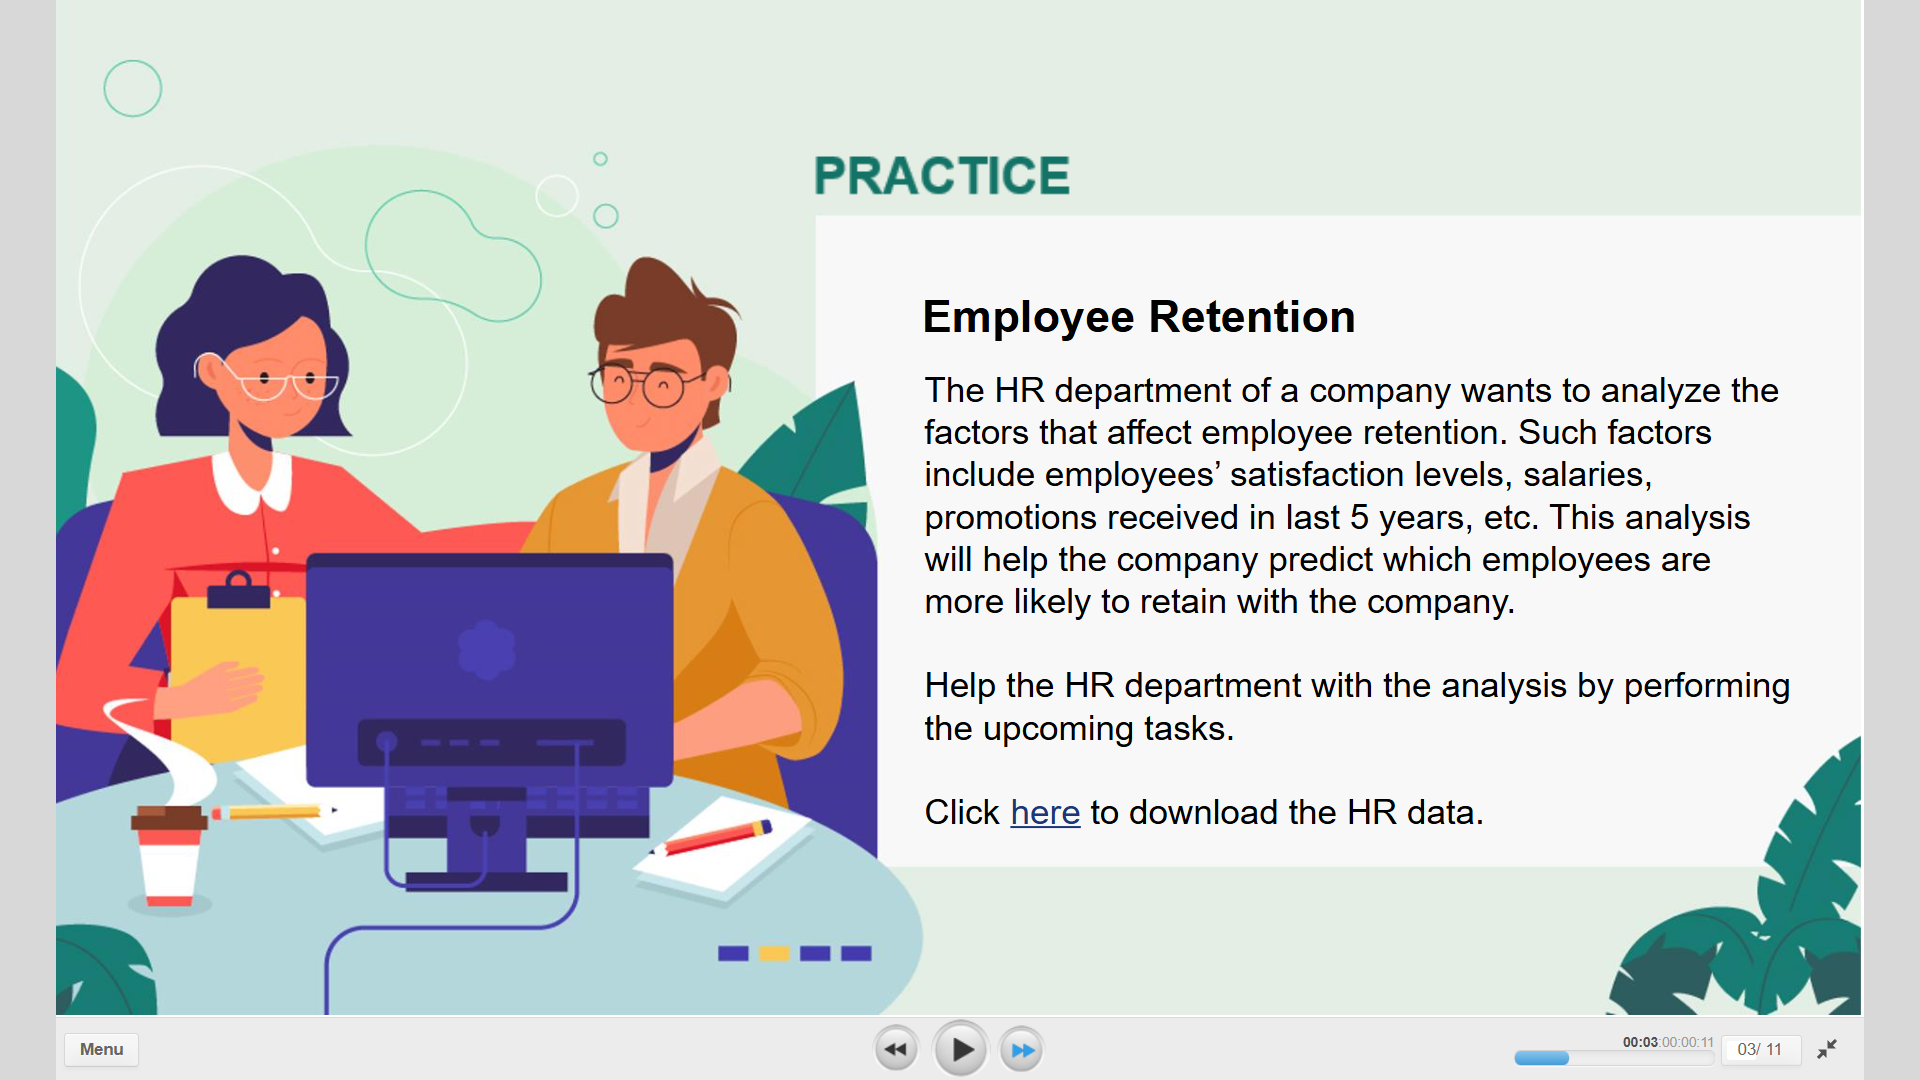

# 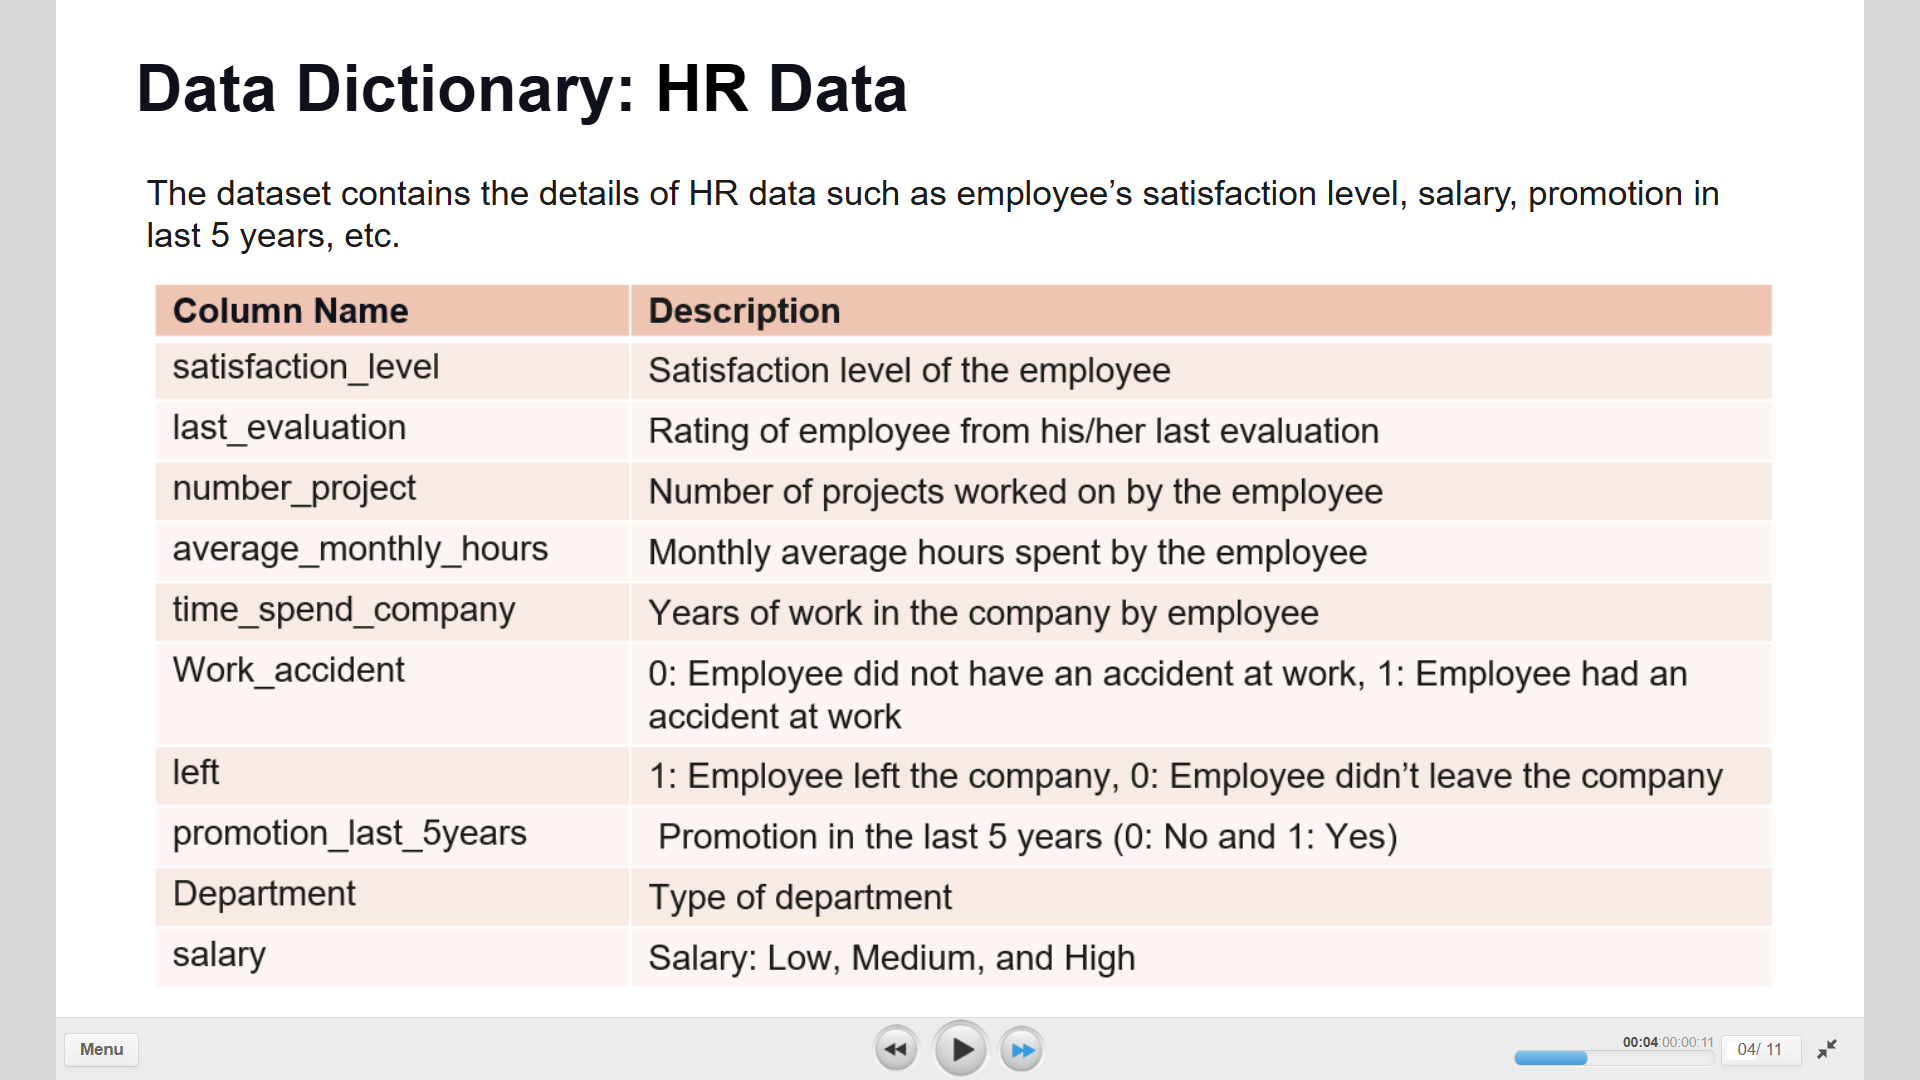

# 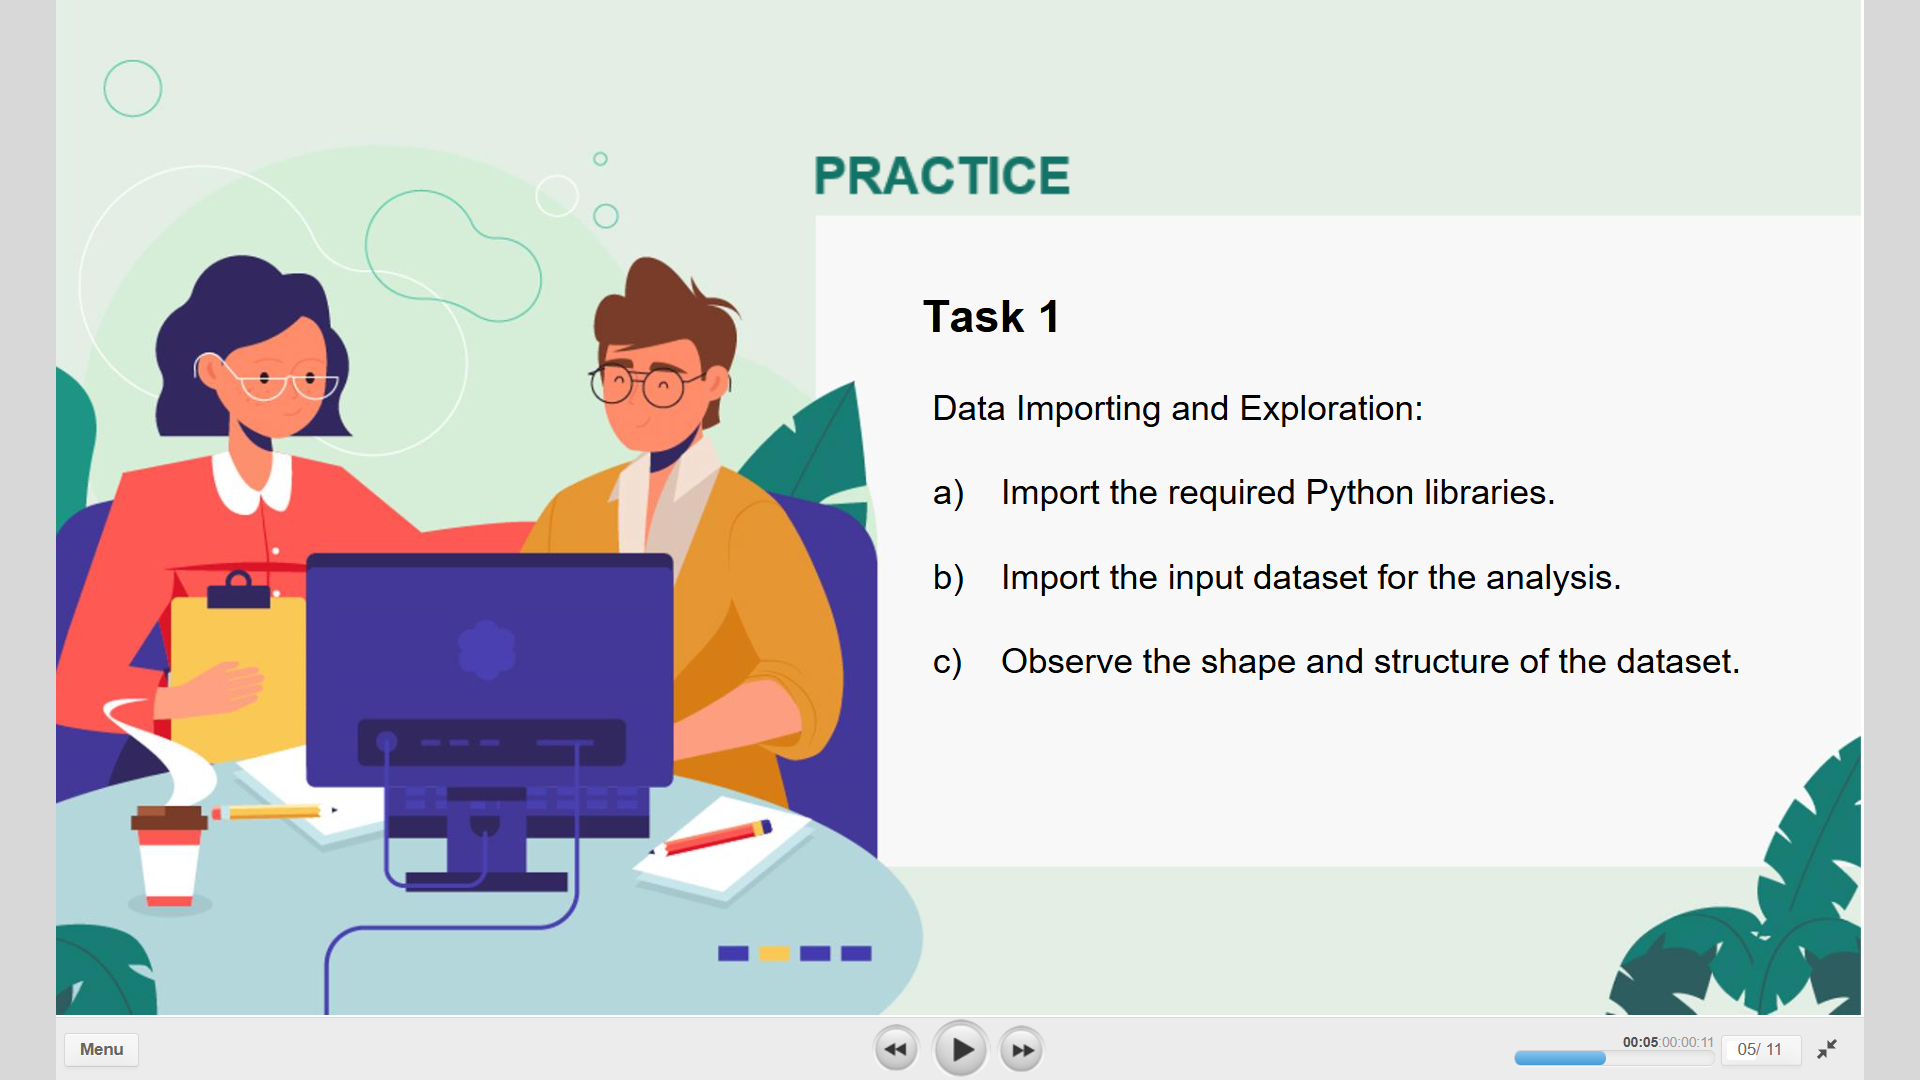

In [226]:
#a
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# we have imported libraries

In [228]:
#b
hr_data=pd.read_csv('Downloads/ds_c9_s4_practice-main/ds_c9_s4_practice-main/DS1_C9_S4_Practice_HR_Data.csv')
hr_data.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# we have loaded the dataset 

In [230]:
#c)
hr_data.shape

(14999, 10)

# there are 14999 rows and 10 columns

In [232]:
hr_data.info()#left,work_accident

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# except Department and Salary all are numerical data types(int and float).

In [234]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# there are no missing value in the dataset

In [236]:
 hr=hr_data

# creating a copy of the dataset

# 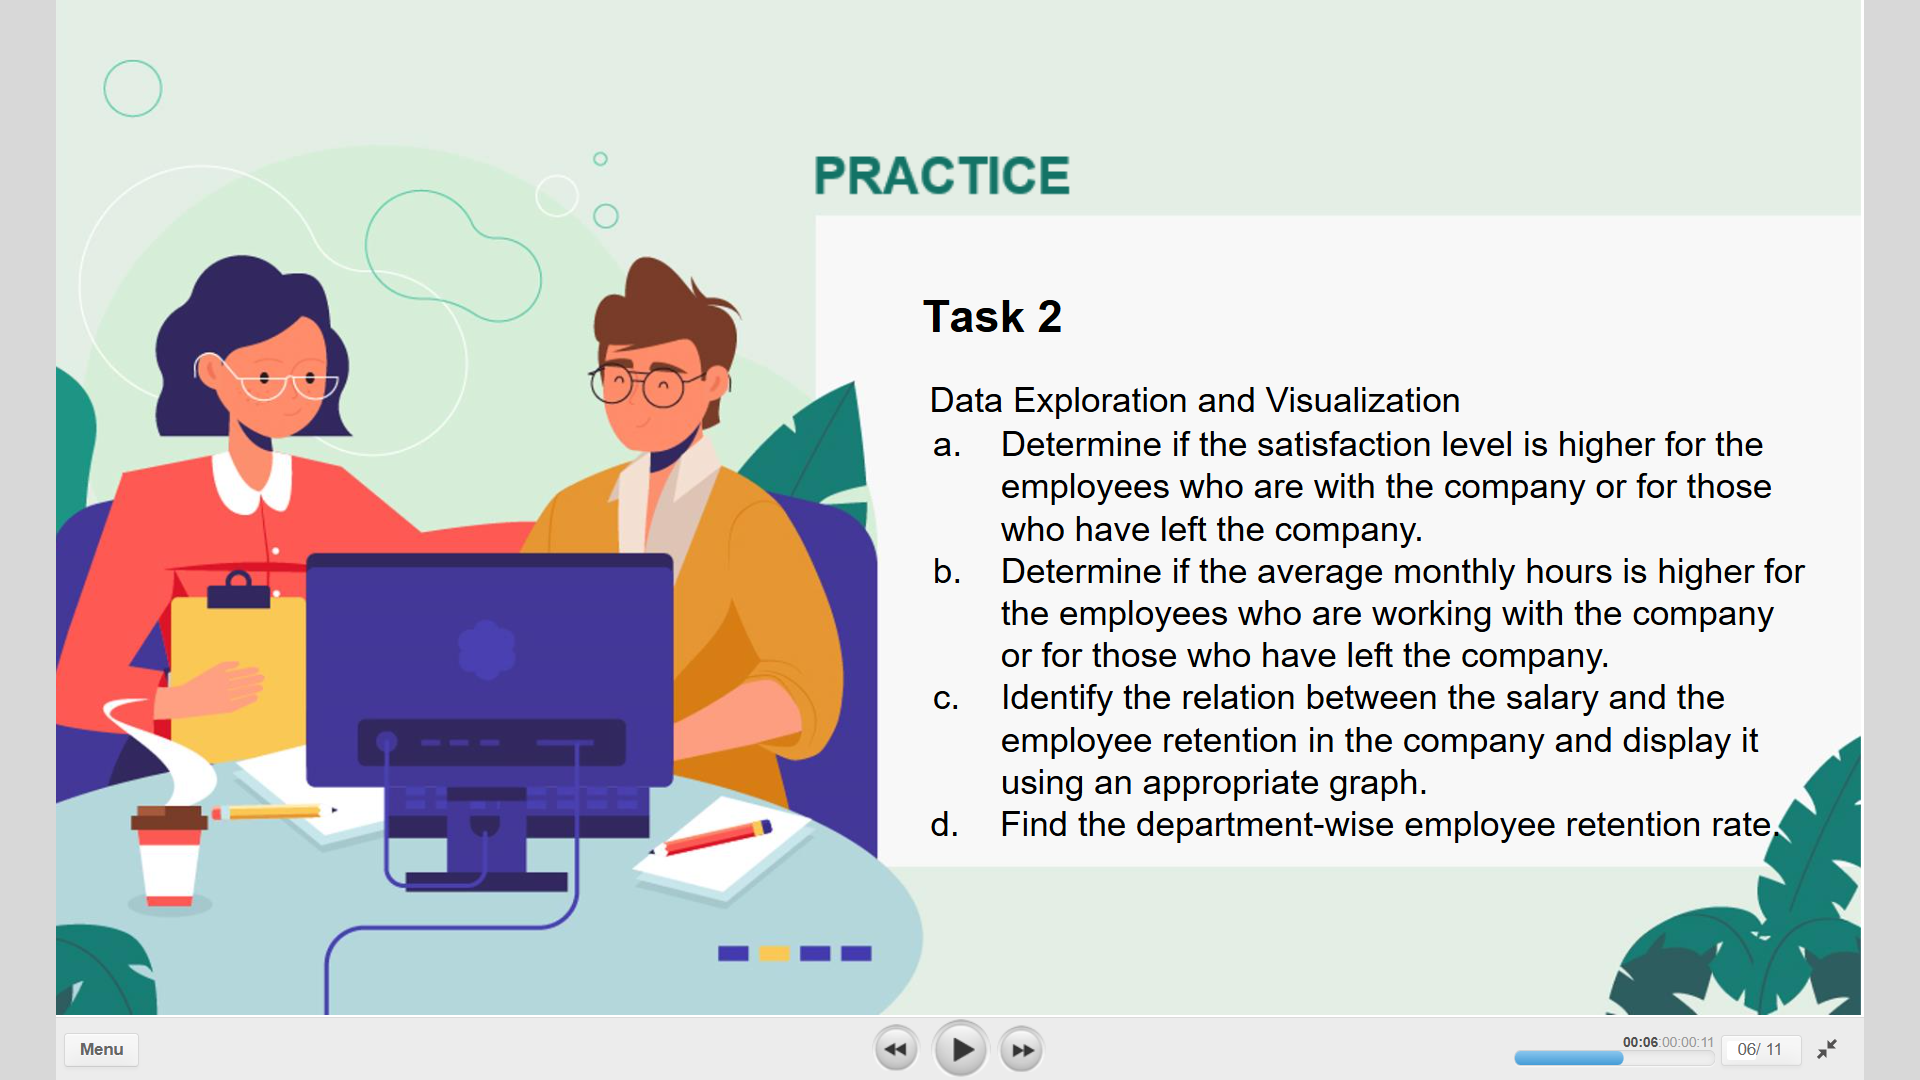

# a. Determine if the satisfaction level is higher for the employees who are with the company or for those who have left the company.



In [240]:
hr.columns #'satisfaction_level','left
# left columns:
# 1 left 
# 0 are still in


hr[hr['left']==1].satisfaction_level.median()
# for employes who left the median satisfication level is 0.41 

0.41

In [241]:
hr[hr['left']==0].satisfaction_level.median()
# for employes who are still there  the median satisfication level is 0.69

0.69

# the satisfaction level is higher for the employees who are still in the company.

# b. Determine if the average monthly hours is higher for the employees who are working with the company or for those who have left the company.



In [244]:
hr.columns#'average_monthly_hours','left'

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [245]:
hr[hr['left']==1].average_monthly_hours.median()# for employes who left the company the average monthly hours is 224 hours

224.0

In [246]:
hr[hr['left']==0].average_monthly_hours.median()# for employes who are still there the average average monthly hours is 198 hours

198.0

# so one of the reasons people left the company might be due to high monthly hours.

# c. Identify the relation between the salary and the employee retention in the company and display it using an appropriate graph.


In [249]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [250]:
#hr['salary'] 
#hr['left']=0

In [251]:
stayed=hr[hr['left']==0]


[]

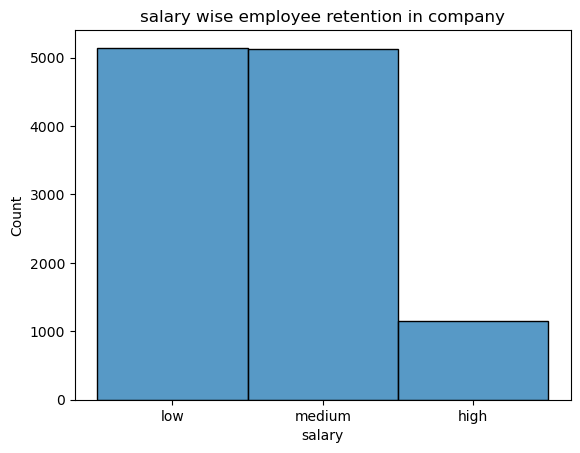

In [252]:
sns.histplot(stayed['salary'])
plt.title('salary wise employee retention in company')
plt.plot()

# the employeea who retain are modtly of low and medium with low salaries a lot the company retains less high salaries employees.

# d. Find the department-wise employee retention rate.

In [255]:
hr.columns#'Department','left==0
existing=hr[hr['left']==0]
existing.groupby('Department')['left'].count()

Department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

# sales has most employees 3126 and hr has least employees 524. 

# 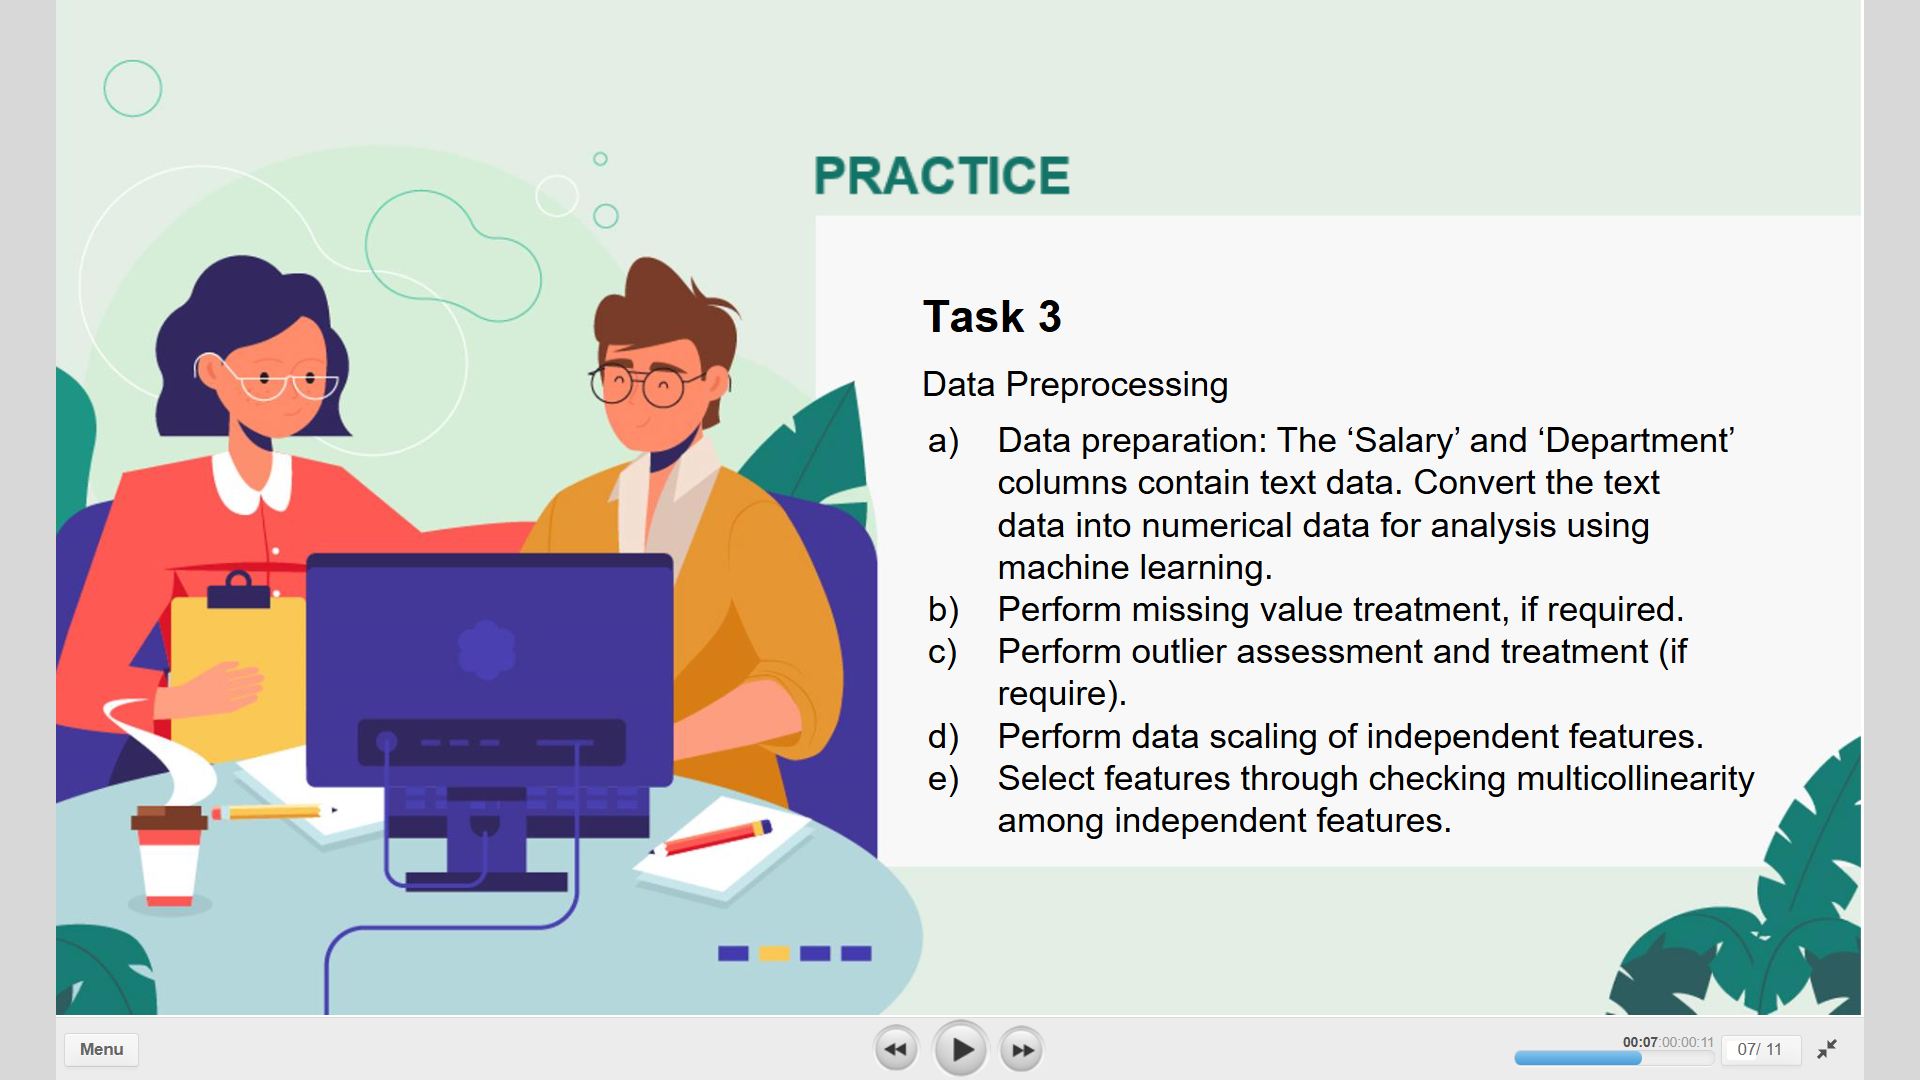

# a) Data preparation: The 'Salary' and 'Department' columns contain text data. Convert the text data into numerical data for analysis using machine learning.


In [259]:
#salary,Department

In [260]:
salary_encoder=preprocessing.LabelEncoder()
salary_encoder.fit(hr['salary'])

LabelEncoder()

In [261]:
salary_encoder.classes_

array(['high', 'low', 'medium'], dtype=object)

In [262]:
hr['salary.enc']=salary_encoder.transform(hr['salary'])

In [263]:
hr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  salary.enc  
0     low           1  
1  medium           2  
2  medium           2  
3     low           1  
4     low           1

In [264]:
department_encoder=preprocessing.LabelEncoder()
department_encoder.fit(hr['Department'])

LabelEncoder()

In [265]:
department_encoder.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [266]:
hr['Department.enc']=department_encoder.transform(hr['Department'])

In [267]:
hr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  salary.enc  Department.enc  
0     low           1               7  
1  medium           2               7  
2  medium           2               7  
3     low           1               7  
4     low           1               7

# b) Perform missing value treatment, if required.



In [269]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary.enc               0
Department.enc           0
dtype: int64

# missing value treatment is not required

# c) Perform outlier assessment and treatment (if require).


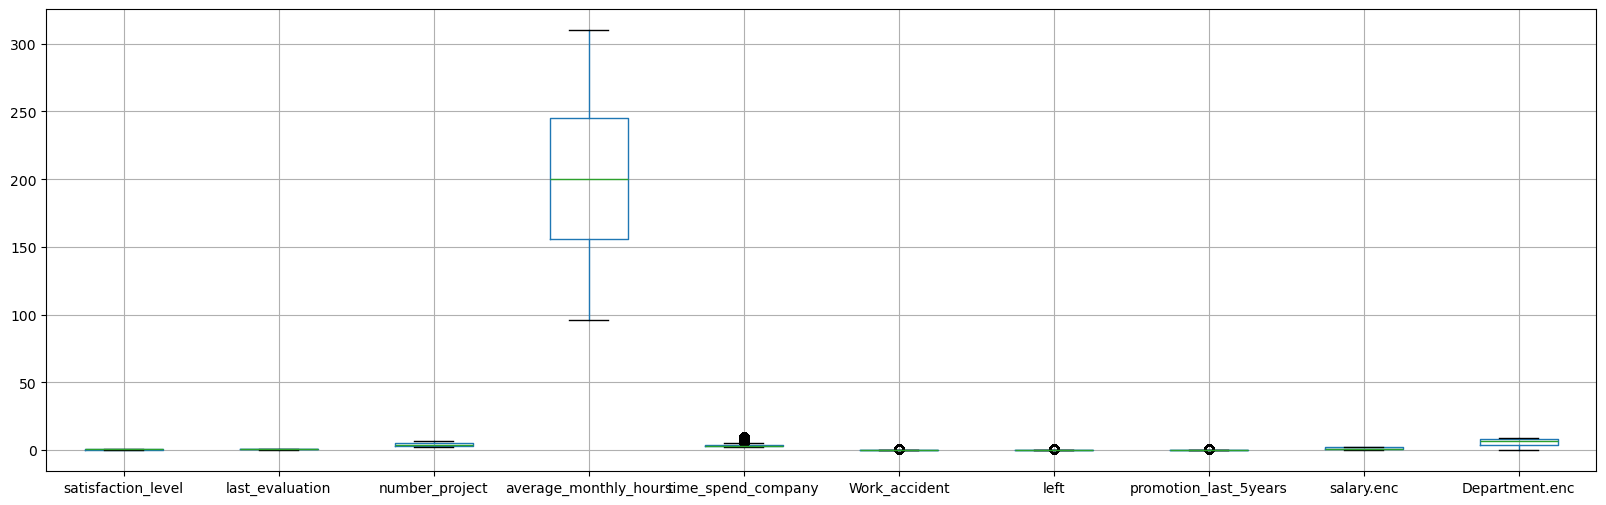

In [272]:
hr.boxplot()
plt.gcf().set_size_inches(20,6)
plt.show()

In [273]:
num_col=pd.DataFrame(hr[['salary','Department']])
hr=pd.DataFrame(hr.drop(['salary','Department'],axis=1))

In [274]:
def iqr_winsorizarion(df,thresh=1.5):
    df_out=df.copy()
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1

        lower_fence=Q1-thresh*IQR
        upper_fence=Q3+thresh*IQR
        df_out.loc[df_out[col]<lower_fence,col]=lower_fence
        df_out.loc[df_out[col]>upper_fence,col]=upper_fence
    return df_out
df=pd.DataFrame(hr)
hr_treated_df=iqr_winsorizarion(df.copy())


In [275]:
hr

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
1                        262                   6              0     1   
2                        272                   4              0     1   
3                        223                   5              0     1   
4                        159                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  salary.enc  Department.enc  
0                          0           1               7  
1                          0           2               7  
2                          0           2               7  
3                          0           1               7  
4                          0           1               7  
...                      ...         ...             ...  
14994                      0           1               8  
14995                      0           1               8  
14996                      0           1               8  
14997                      0           1               8  
14998                      0           1               8  

[14999 rows x 10 columns]

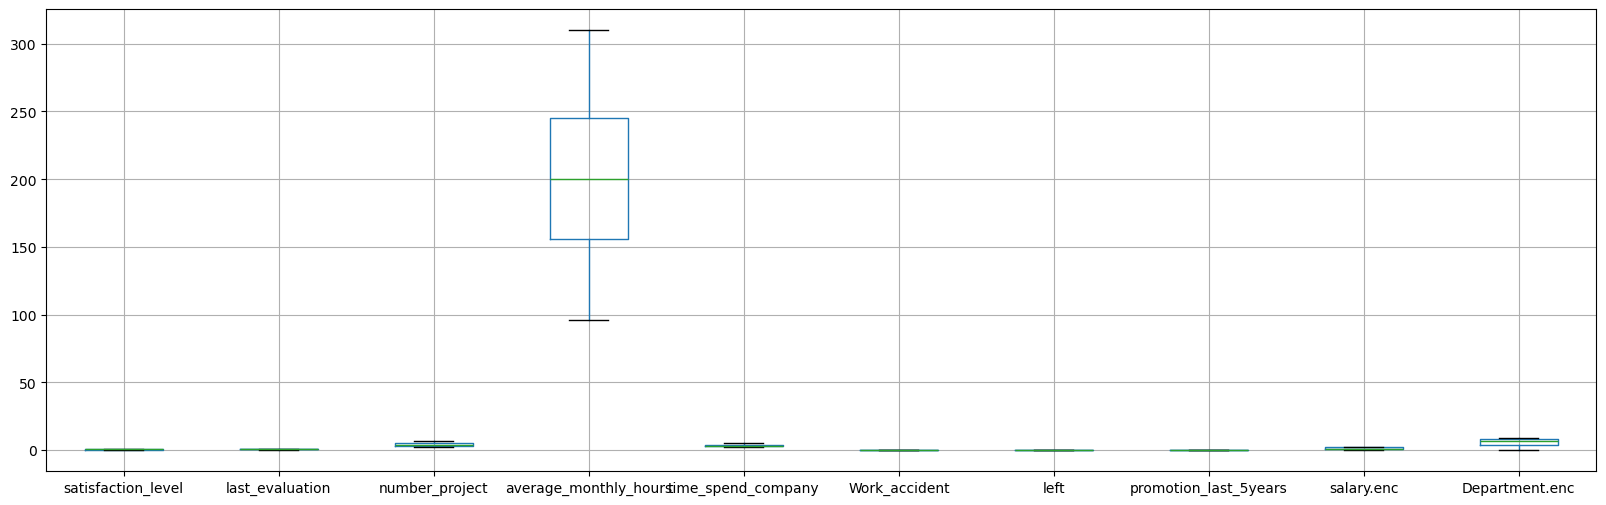

In [276]:
hr_treated_df.boxplot()
plt.gcf().set_size_inches(20,6)
plt.show()

# d) Perform data scaling of independent features.



In [278]:
hrp=hr

In [279]:
cols=hrp.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(hrp)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0           -0.936495        -1.087275       -1.462863              -0.882040   
1            0.752814         0.840707        0.971113               1.220423   
2           -2.022479         0.957554        2.593763               1.420657   
3            0.431041         0.899131        0.971113               0.439508   
4           -0.976716        -1.145699       -1.462863              -0.841993   

   time_spend_company  Work_accident      left  promotion_last_5years  \
0           -0.341235      -0.411165  1.788917              -0.147412   
1            1.713436      -0.411165  1.788917              -0.147412   
2            0.343655      -0.411165  1.788917              -0.147412   
3            1.028546      -0.411165  1.788917              -0.147412   
4           -0.341235      -0.411165  1.788917              -0.147412   

   salary.enc  Department.enc  
0   -0.554955        0.393725  
1    1.043004        0.393725  
2    1.043004        0.393725  
3   -0.554955        0.393725  
4   -0.554955        0.393725

# e) Select features through checking multicollinearity among independent features.

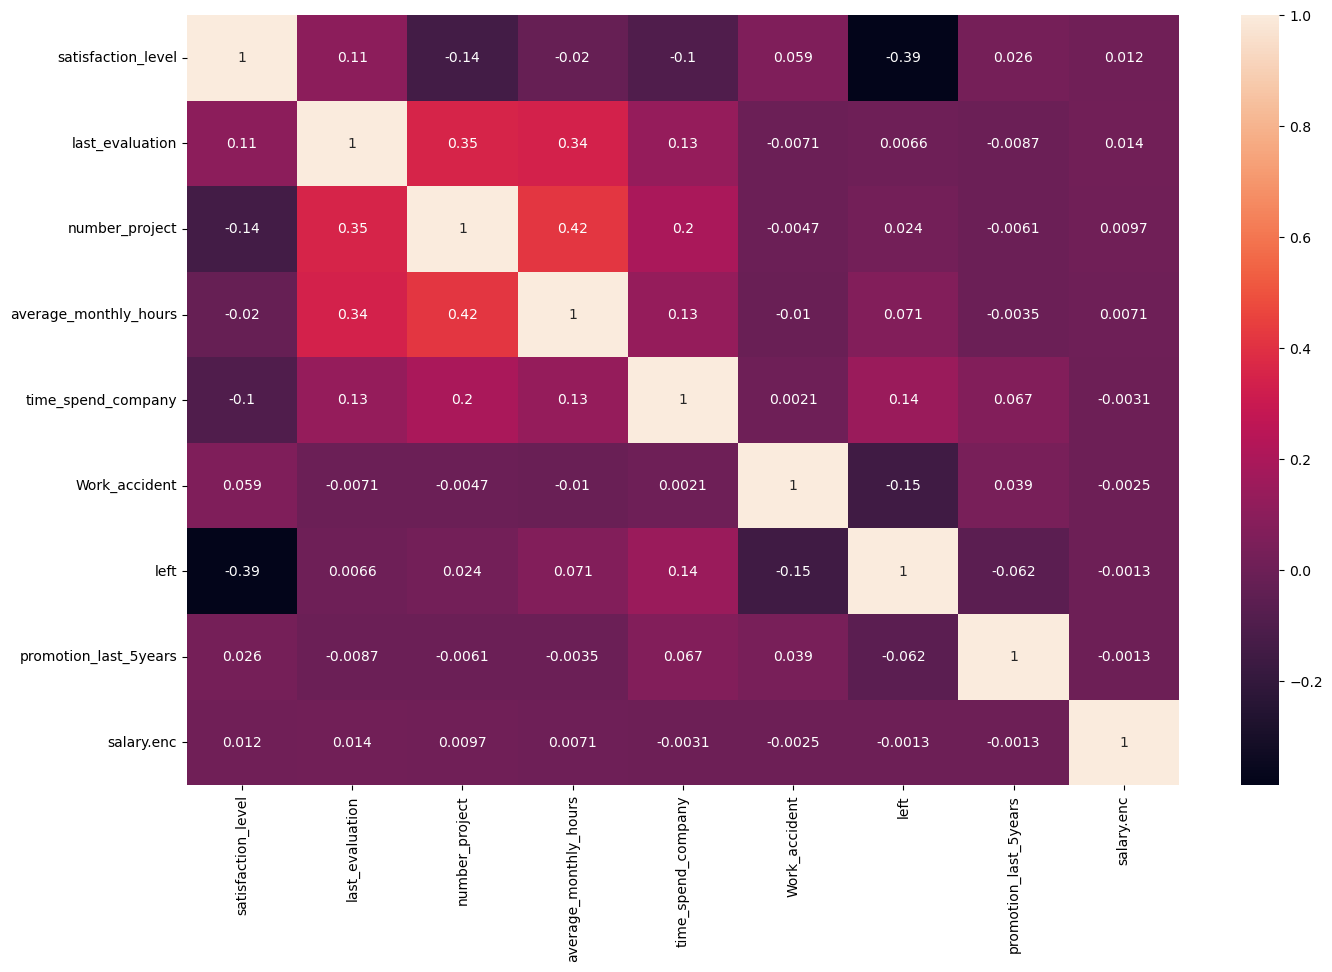

In [281]:
fig,ax=plt.subplots(1,1,figsize=(16,10))
ax=sns.heatmap(df_scaled.iloc[:,:-1].corr(),annot=True)

# 


number of project and average monthly hours has a highest correlation 0.42.

# we are considering dropping number of project columns .

In [284]:
df_scaled=df_scaled.drop('number_project',axis=1)

In [285]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   average_monthly_hours  14999 non-null  float64
 3   time_spend_company     14999 non-null  float64
 4   Work_accident          14999 non-null  float64
 5   left                   14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   salary.enc             14999 non-null  float64
 8   Department.enc         14999 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


# 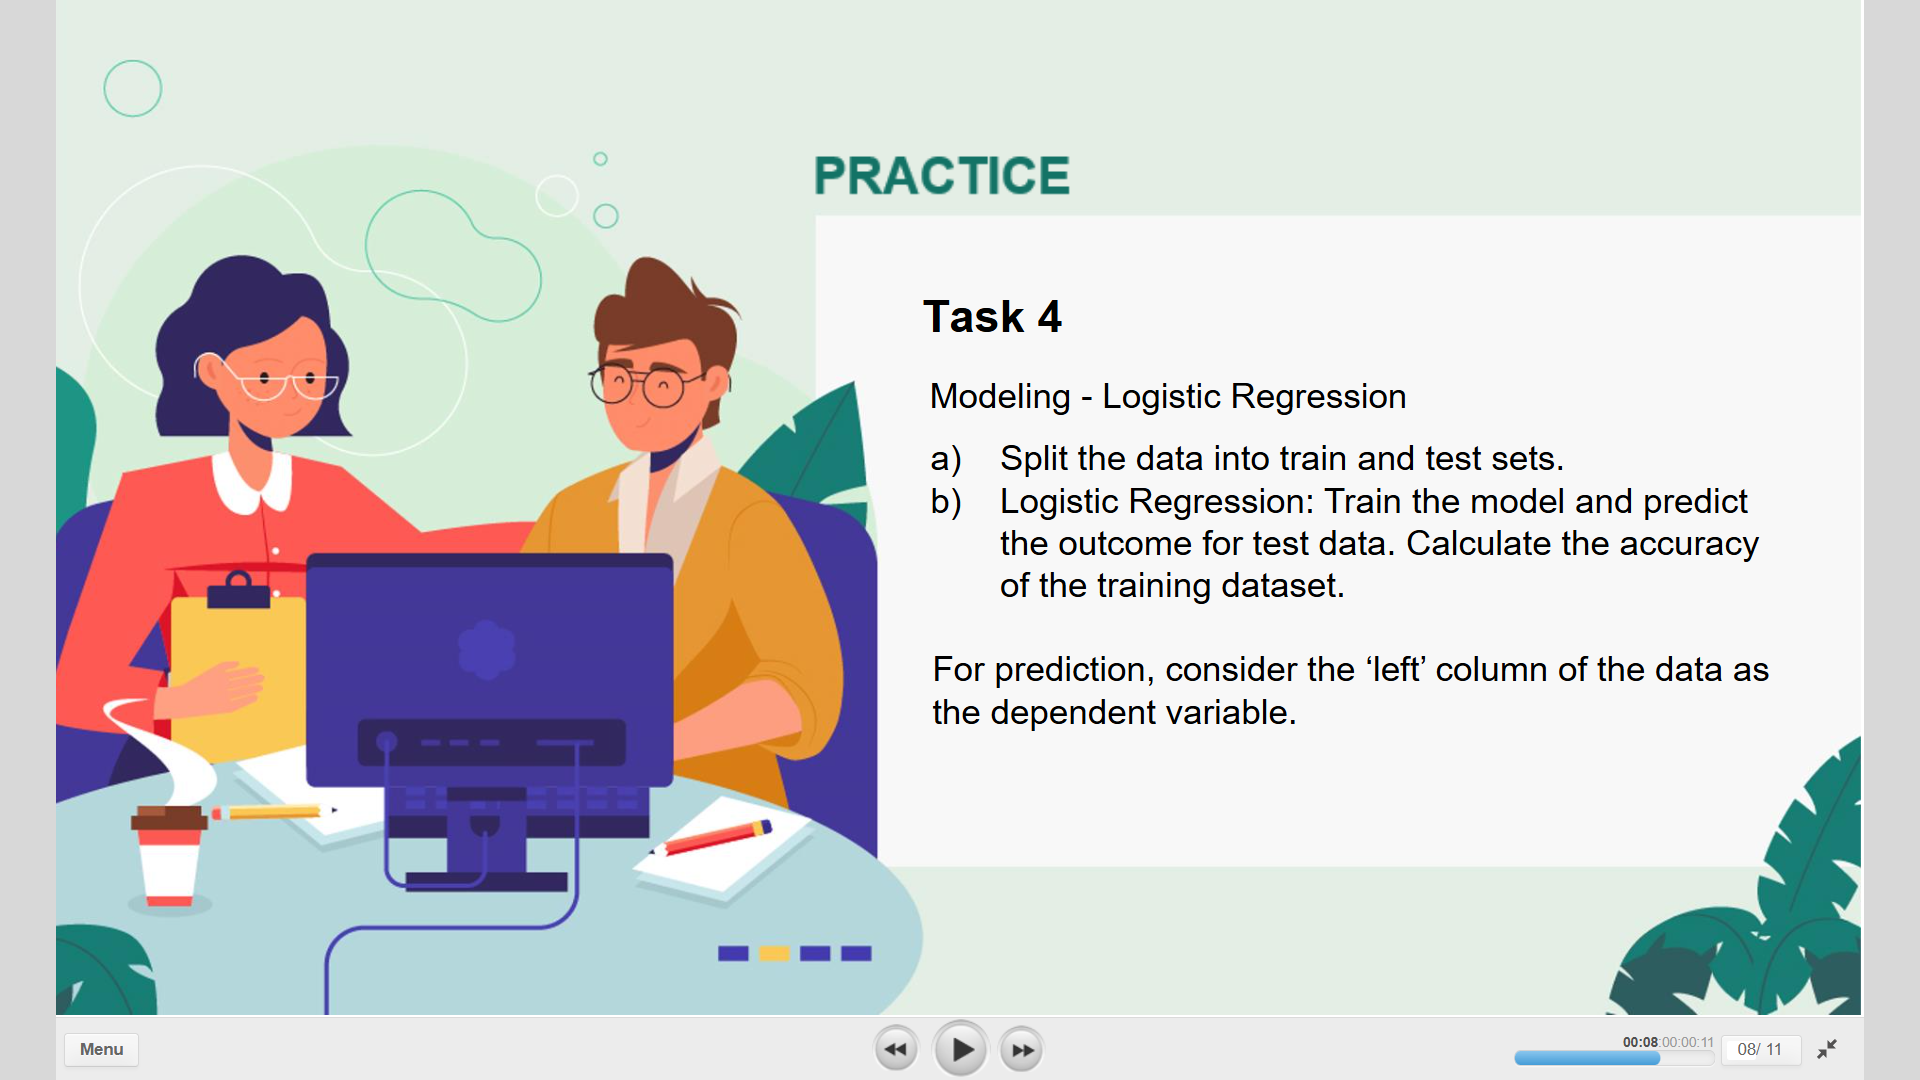

# a) Split the data into train and test sets.

.

In [288]:
X=df_scaled.drop('left',axis=1)
y=hr_data['left']

In [289]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [290]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(11999, 8) (11999,) (3000, 8) (3000,)


# b) Logistic Regression: Train the model and predict the outcome for test data. Calculate the accuracy of the training dataset.

# For prediction, consider the 'left' column of the data as the dependent variable

In [292]:
# Train the model 
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

In [293]:
# guessing the outcome for test data.

In [294]:
y_pred=logreg.predict(x_test)

In [295]:
# accuracy score 

In [296]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7553333333333333

# 0.75533 indicates that approximately 75.53% of the prediction made by the model were correct overall.((tp+tn)/tp)

# 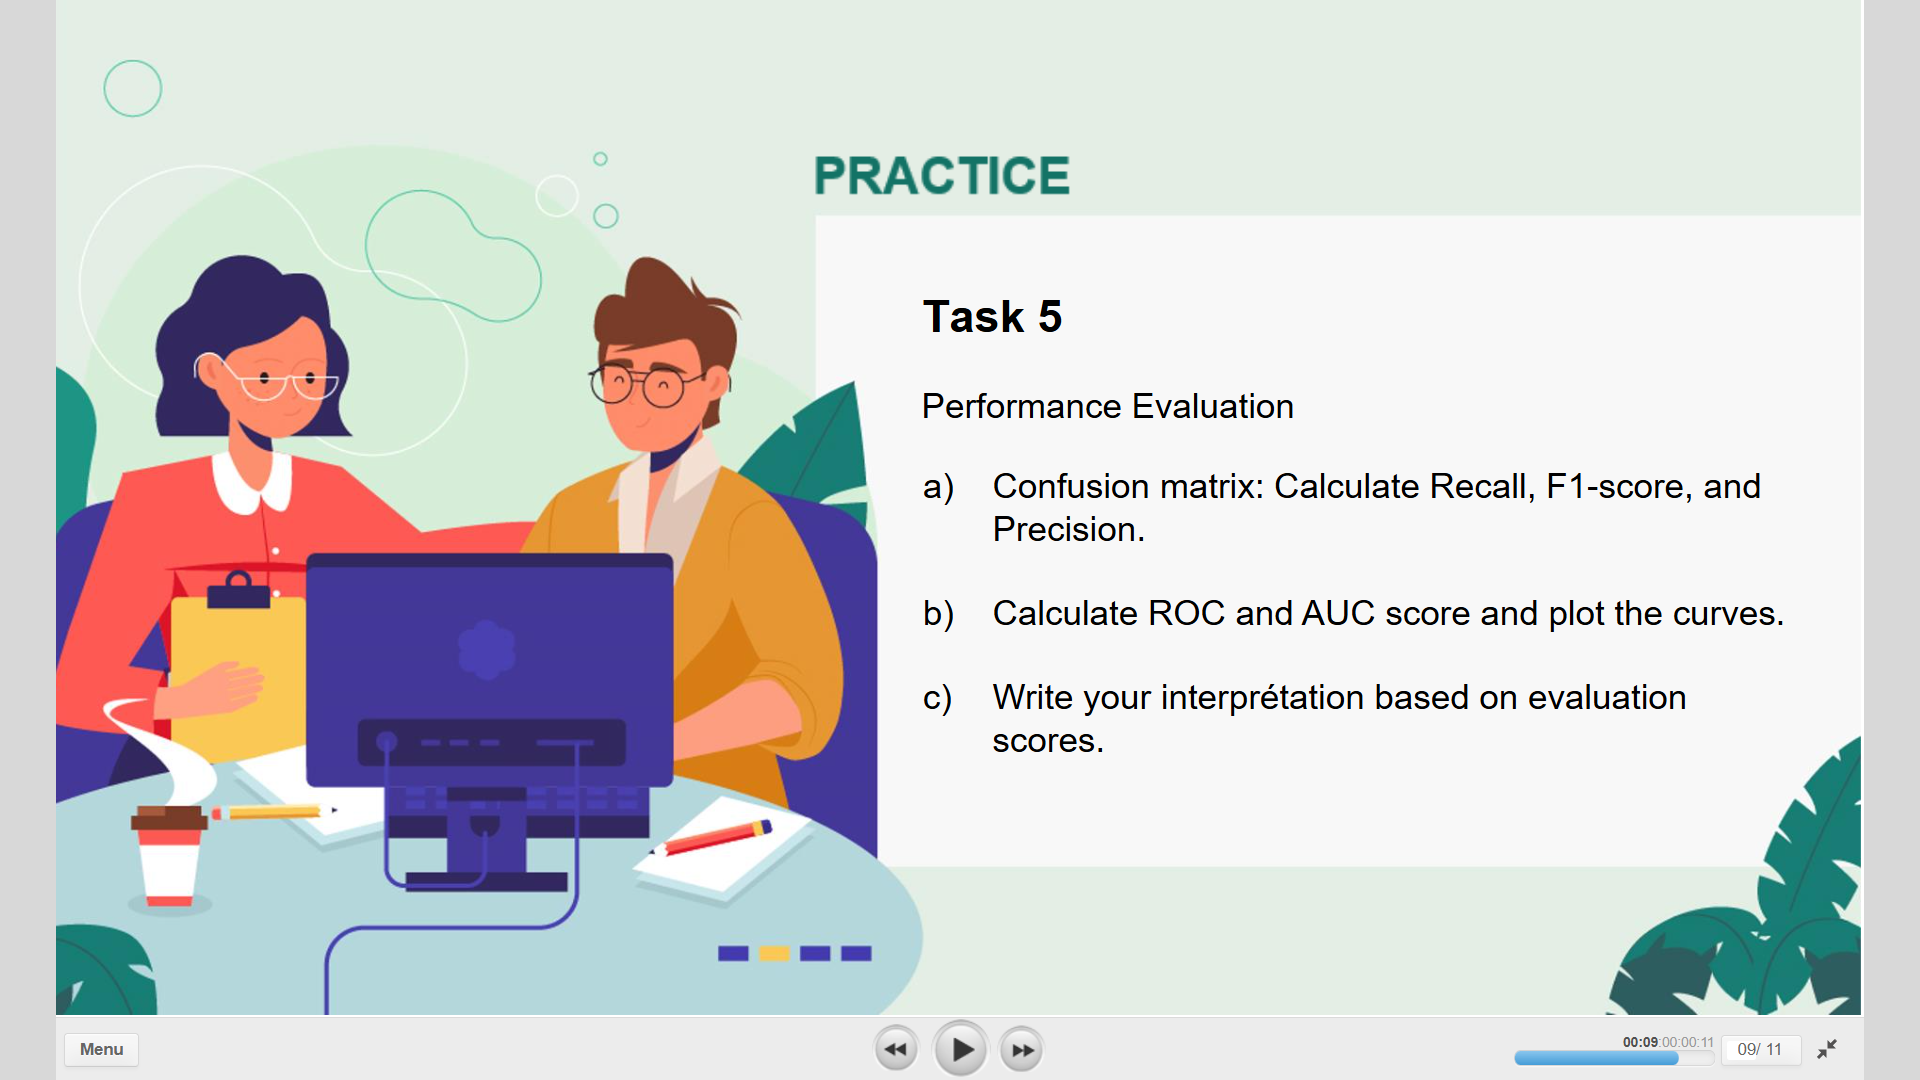

In [299]:
# a)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

[[2100  194]
 [ 540  166]]
2100 194 540 166


In [300]:
# precision
precision=(tp/(tp+fp))
#recall
recall=(tp/(tp+fn))
#fi_score
f1_score=2*((precision*recall)/(precision+recall))

In [301]:
precision

0.46111111111111114

# precsion score of 46.11% means that out of all the instances ,the model labeled as positive (tp) ,and reemaining were false positives.Precision for the positive class tells us what proportion of the instances the model predicted as positive were actully positive.

In [303]:
recall

0.23512747875354106

# 0.23 i recall\sensitivity for positve class.it tells us what proportion of the actual positive instances in the test sset where correctly identified by the model. 

In [305]:
f1_score

0.31144465290806755

# a score of 31.14% is not good but not very bad.

# calculate roc and auc curve

In [308]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
roc

0.7914815345364556

# plotting the curve

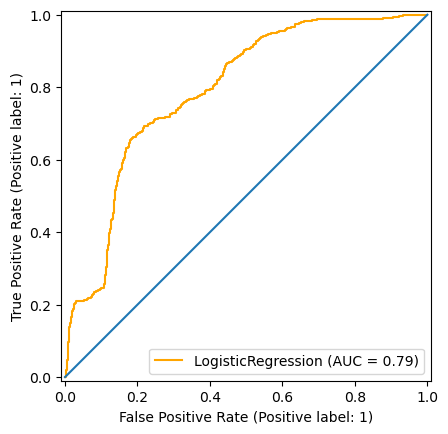

In [311]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg,x_test,y_test,color='orange')
plt.plot([0,1],[0,1])
plt.show()

# in the specific case  ,an aoc of approximately 0.79 suggests that  the logistiv regression has  good ability to distinguish between positive and negative class.There is 79.14% chance that if you randomly pick one positive instance ,and one negative instance ,the classifier will assign a higher probility of being positive and one negative instance the classifier will assign a higher probablity of being positve to the actual positive instances ,than the actual negative instances.4the straight line represents the random guess made by the model.

# 

# 